## 서설

군집분석 - K-means 알고리즘을 사용

추천시스템 - 내일, 금요일 오후 배움, 실습 과제로 시스템 반영은 다음주 월요일

다음주부터 딥러닝, 기초는 일주일- 인공지능 기본 모델, 구조, 활용, 개요부분, 본격적인 솔루션, openai 사용법, 

chatcompletion , 프로젝트 2주 준비기간, 2주는 트랜스포머, 2차 완료시 자연어 처리 끝남

3차 프로젝트는 바로 들어감, 3차 시작하면서 영상처리, object detection, ocr 등 배움, 이번주 목요일까지 2차 프로젝트 챗봇 - 에이젼트 개념, 주제는 자유, 

팀은 다음주부터 시작, 주제에 맞게 기획, 본격적 시작은 다음주 금요일보고 그 다음주부터 한달간 오후에 수행

8월12부터 9월12일까지

## Task1_0730

Task1_0730. 교차 검증을 위한 사용자 함수를 생성한 후 아래 회귀트리 모델들에 대한 교차검증을 수행하세요.
- dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
- rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
- gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
- xgb_reg = XGBRegressor(n_estimators=1000)
- lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

boston = fetch_openml(name='Boston', version=1, parser='auto')
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.drop(['CHAS','RAD'], axis=1, inplace=True)
boston_df['PRICE'] = boston.target

for col in boston_df.columns:
    if boston_df[col].dtype.name == 'category':
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)
        
X_data = boston_df.drop("PRICE", axis=1)
y_target = boston_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=42)

model_lists = ['dt_reg', 'rf_reg', 'gb_reg', 'xgb_reg', 'lgb_reg']

for model in model_lists:
    if model == 'dt_reg':
        result = DecisionTreeRegressor(random_state=0, max_depth=4)
    elif model == 'rf_reg':
        result = RandomForestRegressor(random_state=0, n_estimators=1000)
    elif model == 'gb_reg':
        result = GradientBoostingRegressor(random_state=0, n_estimators=1000)
    elif model =='xgb_reg':
        result = XGBRegressor(n_estimators=1000)
    else:
        result = LGBMRegressor(n_estimators=1000, verbose=-1)
    
    result_reg = result.fit(X_train, y_train)
    pred_result = result_reg.predict(X_test)
    
    mse = mean_squared_error(y_test, pred_result)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, pred_result)
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')
    print(f'R^2 Score: {r2:.4f}')




Mean Squared Error: 20.4499
Root Mean Squared Error: 4.5222
R^2 Score: 0.7256
Mean Squared Error: 9.3171
Root Mean Squared Error: 3.0524
R^2 Score: 0.8750
Mean Squared Error: 7.9282
Root Mean Squared Error: 2.8157
R^2 Score: 0.8936
Mean Squared Error: 9.5584
Root Mean Squared Error: 3.0917
R^2 Score: 0.8717
Mean Squared Error: 10.3390
Root Mean Squared Error: 3.2154
R^2 Score: 0.8612


<Axes: >

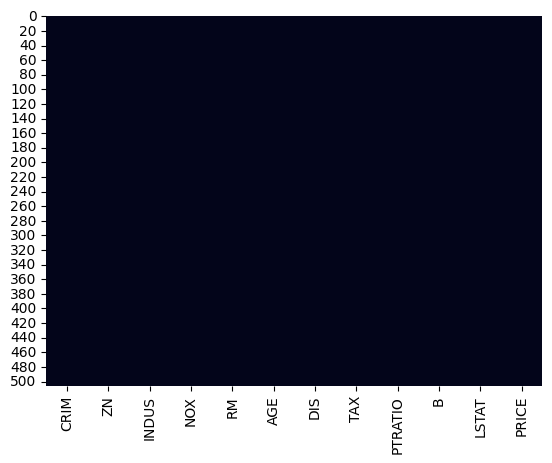

In [3]:
import seaborn as sns
sns.heatmap(boston_df.isna(), cbar=False)

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

boston = fetch_openml(name="Boston", version=1, parser="auto")
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.drop(["CHAS", "RAD"], axis=1, inplace=True)
boston_df["PRICE"] = boston.target

for col in boston_df.columns:
    if boston_df[col].dtype.name == "category":
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)

X_data = boston_df.drop("PRICE", axis=1)
y_target = boston_df["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_target, test_size=0.3, random_state=42
)

model_lists = ["dt_reg", "rf_reg", "gb_reg", "xgb_reg", "lgb_reg"]

def reg_eval(model_lists):
    for model in model_lists:
        if model == "dt_reg":
            result = DecisionTreeRegressor(random_state=0, max_depth=4)
        elif model == "rf_reg":
            result = RandomForestRegressor(random_state=0, n_estimators=1000)
        elif model == "gb_reg":
            result = GradientBoostingRegressor(random_state=0, n_estimators=1000)
        elif model == "xgb_reg":
            result = XGBRegressor(n_estimators=1000)
        else:
            result = LGBMRegressor(n_estimators=1000, verbose=-1)

        result_reg = result.fit(X_train, y_train)
        pred_result = result_reg.predict(X_test)

        mse = mean_squared_error(y_test, pred_result)
        rmse = sqrt(mse)
        r2 = r2_score(y_test, pred_result)
        print(f'{model} 평가')
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"R^2 Score: {r2:.4f}\n")

reg_eval(model_lists)

dt_reg 평가
Mean Squared Error: 20.4499
Root Mean Squared Error: 4.5222
R^2 Score: 0.7256

rf_reg 평가
Mean Squared Error: 9.3171
Root Mean Squared Error: 3.0524
R^2 Score: 0.8750

gb_reg 평가
Mean Squared Error: 7.9282
Root Mean Squared Error: 2.8157
R^2 Score: 0.8936

xgb_reg 평가
Mean Squared Error: 9.5584
Root Mean Squared Error: 3.0917
R^2 Score: 0.8717

lgb_reg 평가
Mean Squared Error: 10.3390
Root Mean Squared Error: 3.2154
R^2 Score: 0.8612



### ex

학습 데이터와 테스트 데이터가 부족하면 교차 검증을 통해 모델의 성능을 평가할 수 있습니다. 교차 검증은 데이터를 여러 번 반복해서 나누어 모델을 학습하고 평가하는 방법입니다. - 방법론

In [4]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(
        model, X_data, y_target, scoring="neg_mean_squared_error", cv=5
    )
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("##### ", model.__class__.__name__, " #####")
    print(" 5 교차 검증의 평균 RMSE : {0:.3f} ".format(avg_rmse))

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.935 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.431 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.259 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 5.045 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.623 


<Axes: xlabel='None', ylabel='None'>

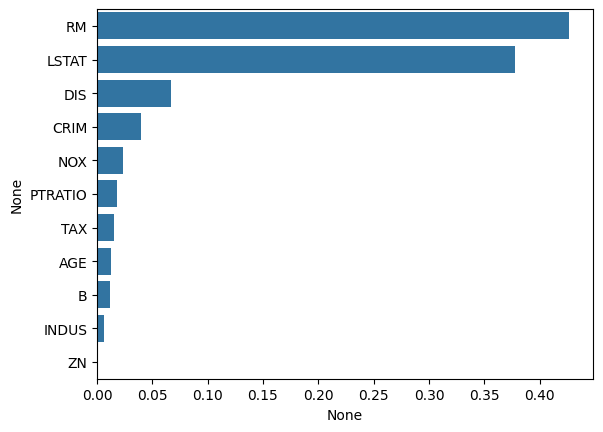

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)


RM : 주택1가구당 평균 방의 수이 가장 중요한 변수. - 변수 중요도
LSTAT : 빈곤층의 비율이 가장 중요한 변수. - 변수 중요도

<Axes: xlabel='None', ylabel='None'>

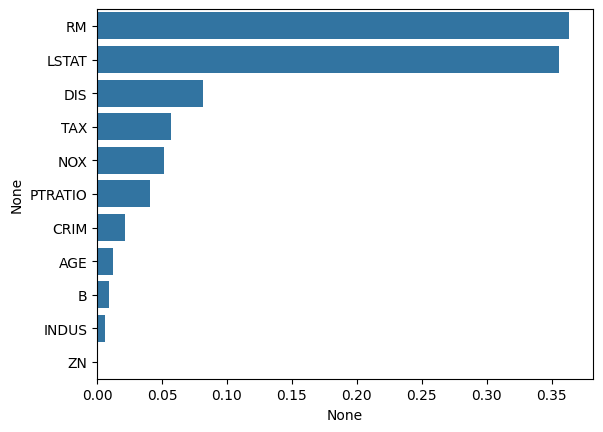

In [8]:
xgb_reg = XGBRegressor(n_estimators=1000)
xgb_reg.fit(X_data, y_target)

feature_series = pd.Series(data=xgb_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

RM 과 price 만의 관계 확인하는 것도 중요.

In [9]:
# sample() 함수는 DataFrame에서 지정된 개수만큼 랜덤하게 데이터를 추출
boston_df.sample(n=3, random_state=1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
307,0.04932,33.0,2.18,0.472,6.849,70.3,3.1827,222.0,18.4,396.90,7.53,28.2
343,0.02543,55.0,3.78,0.484,6.696,56.4,5.7321,370.0,17.6,396.90,7.18,23.9
47,0.22927,0.0,6.91,0.448,6.030,85.5,5.6894,233.0,17.9,392.74,18.80,16.6


(100, 2)


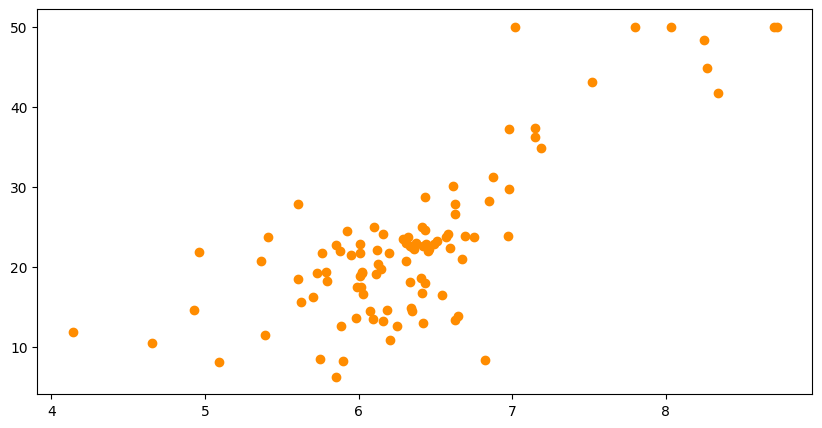

In [10]:
import numpy as np
import matplotlib.pyplot as plt

bostonDF_sample = boston_df[['RM', 'PRICE']].sample(n=100, random_state=1)
print(bostonDF_sample.shape)
plt.figure(figsize=(10,5))
plt.scatter(bostonDF_sample['RM'], bostonDF_sample['PRICE'], c='darkorange')

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg5 = DecisionTreeRegressor(max_depth=5)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample["RM"].values.reshape(-1, 1)
y_target = bostonDF_sample["PRICE"].values.reshape(-1, 1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg5.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt5 = dt_reg5.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

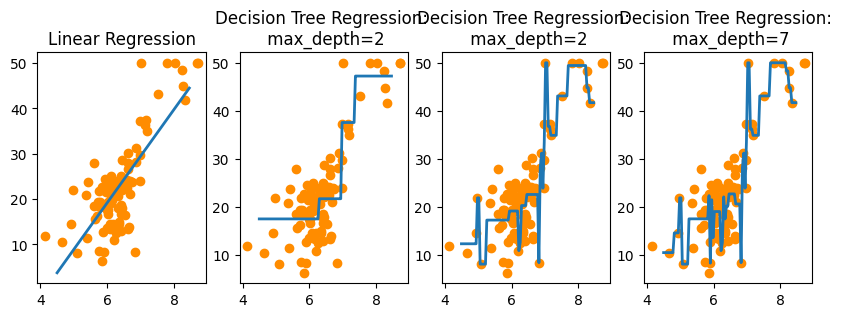

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(10, 3), ncols=4)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title("Linear Regression")
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label="linear", linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title("Decision Tree Regression: \n max_depth=2")
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_dt2, label="max_depth:2", linewidth=2)

# DecisionTreeRegressor의 max_depth를 5로 했을 때 회귀 예측선
ax3.set_title("Decision Tree Regression: \n max_depth=5")
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_dt5, label="max_depth:2", linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax4.set_title("Decision Tree Regression: \n max_depth=7")
ax4.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax4.plot(X_test, pred_dt7, label="max_depth:7", linewidth=2)

선형 회귀는 직선으로 예측 회귀선을 표현하는데 반해 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다. 

max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음을 알 수 있다.

## Task2_0730

Task2_0730. iris 데이터셋에 대하여 랜덤포레스트로 학습 및 평가한 결과와 차원축소한 후 c1,c2를 적용하여 학습 평가한 결과를 비교하셍요. (단 cross_val_score를 적용하여 평가)

In [16]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
X = df_iris.drop("target", axis=1)
y = df_iris['target']
iris_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(iris_scaled, y, test_size=0.3, random_state=42)

# random forest eval
rf = RandomForestRegressor(n_estimators=1000, random_state=0)
neg_mse_scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 3))
print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 3))
print(f"5 folds의 평균 RMSE: {avg_rmse:.3f}")

5 folds의 개별 Negative MSE scores: [-0.02  -0.054 -0.109 -0.003 -0.053]
5 folds의 개별 RMSE scores: [0.141 0.233 0.33  0.052 0.229]
5 folds의 평균 RMSE: 0.197


In [17]:
# decomposition

from sklearn.datasets import load_iris
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["target"] = iris.target
X = df_iris.drop("target", axis=1)
y = df_iris["target"]
iris_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca, y, test_size=0.3, random_state=42
)

# random forest eval
rf = RandomForestRegressor(n_estimators=1000, random_state=0)
neg_mse_scores = cross_val_score(
    rf, X_train, y_train, scoring="neg_mean_squared_error", cv=5
)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 3))
print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 3))
print(f"5 folds의 평균 RMSE: {avg_rmse:.3f}")

5 folds의 개별 Negative MSE scores: [-0.052 -0.103 -0.057 -0.078 -0.133]
5 folds의 개별 RMSE scores: [0.229 0.322 0.238 0.28  0.365]
5 folds의 평균 RMSE: 0.287


### ex

In [ ]:
# 분류를 적용한 결과 비교
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring="accuracy", cv=3)
print("cv=3인 경우의 개별 폴드 세트별 정확도:", scores)
print("평균 정확도 : {:.2f}".format(np.mean(scores)))

In [ ]:
# PCA 변환 데이터 세트 적용
pca_X = df_iris_pca[["pca_component_1", "pca_component_2"]]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring="accuracy", cv=3)
print("cv=3인 경우의 개별 폴드 세트별 정확도:", scores_pca)
print("평균 정확도 : {:.2f}".format(np.mean(scores_pca)))

## Task3_0730

Task3_0730. 상관도가 높은 BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성에 대하여 2개의 컴포넌트로 PCA 변환하고 변동성을 알아보기 위하여 explained_variance_ratio_ 계산하세요.

In [18]:
import pandas as pd

df = pd.read_excel(
    r"D:\kdt_240424\workspace\M5_ML\data\credit_card.xls", header=1, sheet_name="Data"
)
df.rename(
    columns={"PAY_0": "PAY_1", "default payment next month": "default"}, inplace=True
)
y_target = df["default"]
X_features = df.drop(["default", "ID"], axis=1)
X_features

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [40]:
X_features_pca = X_features[
    [
        "BILL_AMT1",
        "BILL_AMT2",
        "BILL_AMT3",
        "BILL_AMT4",
        "BILL_AMT5",
        "BILL_AMT6",
    ]
]
X_features_pca

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980
29996,1683,1828,3502,8979,5190,0
29997,3565,3356,2758,20878,20582,19357
29998,-1645,78379,76304,52774,11855,48944


In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_features_pca = pca.fit_transform(X_features_pca)

In [42]:
X_features.drop(
    [
        "BILL_AMT1",
        "BILL_AMT2",
        "BILL_AMT3",
        "BILL_AMT4",
        "BILL_AMT5",
        "BILL_AMT6",
    ], axis=1, inplace=True
)

In [43]:
X_features_pca = pd.DataFrame(X_features_pca)
X_features_pca

,0,1
0,-107289.378431,1830.698021
1,-103860.702650,-3334.488402
2,-68874.738469,2603.127512
3,-14775.024768,11322.393759
4,-66777.116291,-15897.814429
...,...,...
29995,200794.455046,148424.704969
29996,-102148.258619,-4429.879446
29997,-83686.979484,-22831.586379
29998,-1362.841368,-10490.953549


In [35]:
type(X_features_pca)

pandas.core.frame.DataFrame

In [45]:
pca.explained_variance_ratio_

array([0.9066601 , 0.05004773])

In [ ]:
X_features

In [44]:
result_df = pd.concat([X_features, X_features_pca], axis=1)
result_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,0,1
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0,-107289.378431,1830.698021
1,120000,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000,-103860.702650,-3334.488402
2,90000,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,-68874.738469,2603.127512
3,50000,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000,-14775.024768,11322.393759
4,50000,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679,-66777.116291,-15897.814429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,8500,20000,5003,3047,5000,1000,200794.455046,148424.704969
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1837,3526,8998,129,0,0,-102148.258619,-4429.879446
29997,30000,1,2,2,37,4,3,2,-1,0,0,0,0,22000,4200,2000,3100,-83686.979484,-22831.586379
29998,80000,1,3,1,41,1,-1,0,0,0,-1,85900,3409,1178,1926,52964,1804,-1362.841368,-10490.953549


### ex

In [19]:
# 상관도가 높은 속성을 PCA로 변환한 뒤 explained_variance_ratio_ 속성으로 확인
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ["BILL_AMT" + str(i) for i in range(1, 7)]
print("대상 속성명:", cols_bill)

# 6개의 속성을 2개의 컴포넌트로 PCA 변환하고 변동성을 알아보기 위하여 explained_variance_ratio_ 계산
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
# 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명
print("PCA Component 별 변동성:", pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component 별 변동성: [0.90555253 0.0509867 ]


## Task4_0730

Task4_0730. 신용카드 데이터셋 전체 23개 속성에 대하여 6개의 컴포넌트를 가진 PCA 변환을 수행하고 모델은 RF, cv=3, scoring='accuracy'을 적용하여 cross_val_score()로 분류 예측 수행하세요.

In [47]:
import warnings
import pandas as pd

# FutureWarning 경고 메시지를 무시하도록 설정
warnings.simplefilter(action="ignore", category=FutureWarning)

In [50]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from math import sqrt

df = pd.read_excel(
    r"D:\kdt_240424\workspace\M5_ML\data\credit_card.xls", header=1, sheet_name="Data"
)
df.rename(
    columns={"PAY_0": "PAY_1", "default payment next month": "default"}, inplace=True
)
y_target = df["default"]
X_features = df.drop(["default", "ID"], axis=1)

pca = PCA(n_components=6)
X_features_pca = pca.fit_transform(X_features)
X_features_pca = pd.DataFrame(X_features_pca)
X_train, X_test, y_train, y_test = train_test_split(X_features_pca, y_target, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=1000, random_state=0)
neg_mse_scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=3)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("3 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 3))
print("3 folds의 개별 RMSE scores:", np.round(rmse_scores, 3))
print(f"3 folds의 평균 RMSE: {avg_rmse:.3f}")

d:\kdt_240424\workspace\M5_ML\venv\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\kdt_240424\workspace\M5_ML\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
  File "d:\kdt_240424\workspace\M5_ML\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "d:\kdt_240424\workspace\M5_ML\venv\lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "d:\kdt_240424\workspace\M5_ML\venv\lib\site-packages\sklearn\metrics\_classification.py", line 231, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "d:\kdt_240424\workspace\M5_ML\venv\lib\site-packages\sklearn\metrics\_classifi

KeyboardInterrupt: 

In [54]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from math import sqrt

df = pd.read_excel(
    r"D:\kdt_240424\workspace\M5_ML\data\credit_card.xls", header=1, sheet_name="Data"
)
df.rename(
    columns={"PAY_0": "PAY_1", "default payment next month": "default"}, inplace=True
)
y_target = df["default"]
X_features = df.drop(["default", "ID"], axis=1)

pca = PCA(n_components=6)
X_features_pca = pca.fit_transform(X_features)
X_train, X_test, y_train, y_test = train_test_split(
    X_features_pca, y_target, test_size=0.3, random_state=42
)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=0)
accuracy_scores = cross_val_score(rf, X_train, y_train, scoring="accuracy", cv=3)

print("3 folds의 개별 Accuracy scores:", np.round(accuracy_scores, 3))
print(f"3 folds의 평균 Accuracy: {np.mean(accuracy_scores):.3f}")

3 folds의 개별 Accuracy scores: [0.776 0.779 0.776]
3 folds의 평균 Accuracy: 0.777


### ex

In [20]:
# 원본 데이터 세트와 PCA 변환한 데이터 세트의 분류 예측 결과 비교

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=150)
scores = cross_val_score(rcf, X_features, y_target, scoring="accuracy", cv=3)

print("CV=3 인 경우의 개별 Fold세트별 정확도:", scores)
print("평균 정확도:{0:.4f}".format(np.mean(scores)))

# 원본 데이터 세트의 분류 예측 결과

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8067 0.8214 0.8225]
평균 정확도:0.8169


In [21]:
# 전체 23개 속성의 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측결과 보다
# 1~2% 정도의 예측 성능 저하만 발생
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)
rcf = RandomForestClassifier(n_estimators=300, random_state=150)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring="accuracy", cv=3)

print("CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:", scores_pca)
print("PCA 변환 데이터 세트 평균 정확도:{0:.4f}".format(np.mean(scores_pca)))

# 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대한 동일한 분류 예측

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7908 0.7986 0.8025]
PCA 변환 데이터 세트 평균 정확도:0.7973
